# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [92]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [93]:
del tips['Unnamed: 0']

In [94]:
tips.sort_values(by='total_bill', ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


### Step 5. Plot the total_bill column histogram

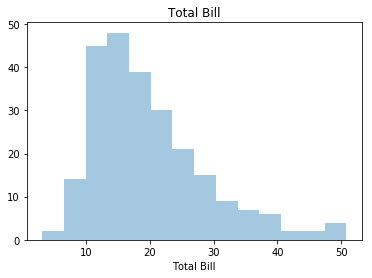

In [95]:
#O eixo X são os valores de total_bill, os valores do eixo Y eu não sei

sns.distplot(tips['total_bill'], kde=False, axlabel='Total Bill')
plt.title('Total Bill')

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

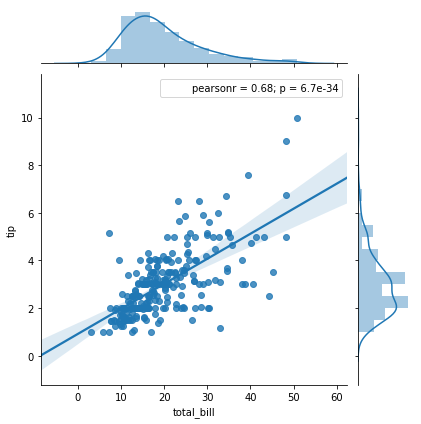

In [96]:
#Jointplot gera gráfil bivariável e univariável

#kind='reg' cria uma regressão linear no gráfio bivariável e curva de densidade nos outros

sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')
plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

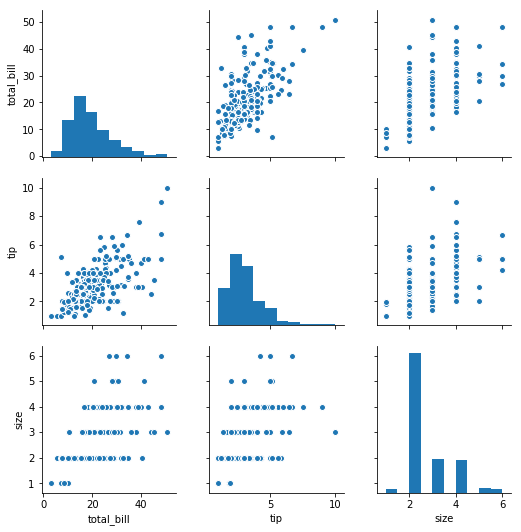

In [97]:
#Cria pares entre as variáveis para entender a relação
#Quando o par possui duas variáveis iguais (diagonais), plota a distribuição de uma variável

sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

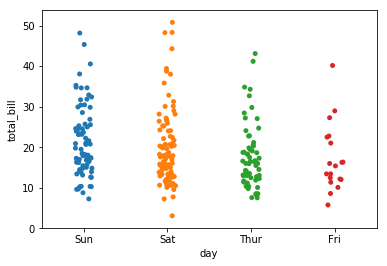

In [98]:
#Distribuição != Total

sns.stripplot(x='day',y='total_bill',data=tips, jitter=True)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

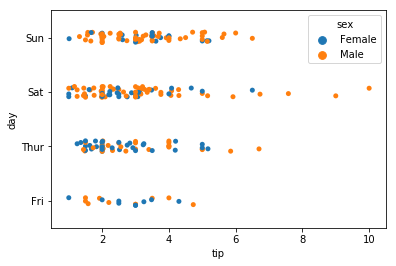

In [99]:
#Usar stripplot para variáveis categóricas
#Jitter destaca os pontos entre si para melhorar leitura

sns.stripplot(x='tip',y='day',data=tips, hue='sex', jitter=True)

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

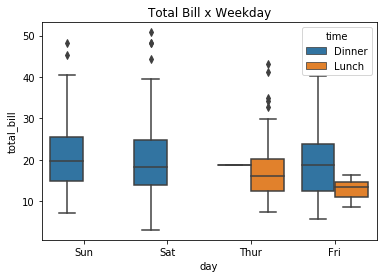

In [100]:
sns.boxplot(x=tips['day'],y=tips['total_bill'],hue=tips['time'])
plt.title('Total Bill x Weekday')

#Os pontos referentes a cada boxplot são outliers
#Cada box agrupa os dados mais concentrados
#A linha representa a mediana do boxplot

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

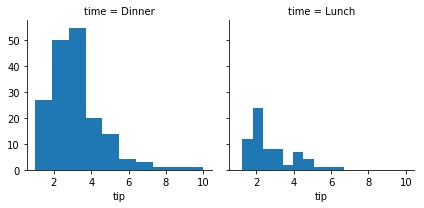

In [101]:
step11 = sns.FacetGrid(tips, col='time')
step11 = step11.map(plt.hist,'tip')

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

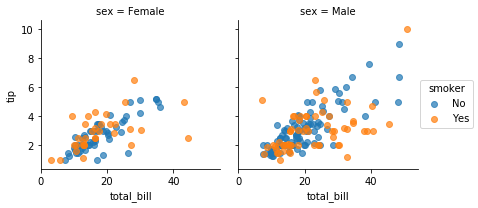

In [102]:
step12 = sns.FacetGrid(tips, col='sex', hue='smoker')
step12 = step12.map(plt.scatter, 'total_bill', 'tip',alpha=0.7).add_legend()

### BONUS: Create your own question and answer it using a graph.

#### Traçar relação entre o valor médio da gorjeta no meio de semana e no fim de semana, diferenciando por gênero

In [103]:
dicio = {'Fri':'Week', 'Thur':'Week','Sat':'Weekend','Sun':'Weekend'}
tips['week_period'] = tips.day.map(dicio)
tips

,total_bill,tip,sex,smoker,day,time,size,week_period
0,16.99,1.01,Female,No,Sun,Dinner,2,Weekend
1,10.34,1.66,Male,No,Sun,Dinner,3,Weekend
2,21.01,3.50,Male,No,Sun,Dinner,3,Weekend
3,23.68,3.31,Male,No,Sun,Dinner,2,Weekend
4,24.59,3.61,Female,No,Sun,Dinner,4,Weekend
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Weekend
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Weekend
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Weekend
242,17.82,1.75,Male,No,Sat,Dinner,2,Weekend


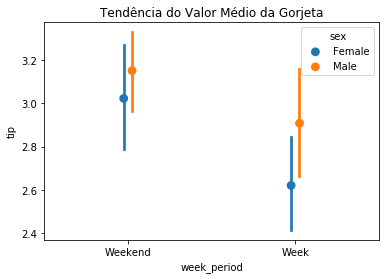

In [104]:
#Plot ploint é um gráfico estatístico que representa a tendência central de distribuição dado um estimador - nesse caso a média
#Foi adotoda Intervalo de Incerteza como de +/-80%

sns.pointplot(x ="week_period", y ="tip", hue = "sex", 
              data=tips, dodge=True, ci=80, join=False)
plt.title('Tendência do Valor Médio da Gorjeta')

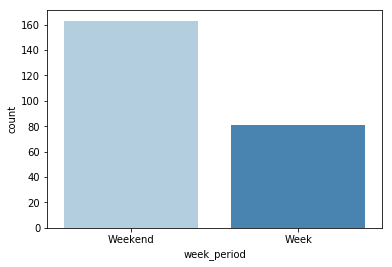

In [105]:
#Número absoluto de observations no fim de semana e no meio de semana
sns.countplot(x = "week_period", data = tips, palette = "Blues")

Pelos gráficos, é possível perceber que o valor médio das gorjetas tendem a diminuir entre final de semana e o meio de semana, o que é natural, uma vez que as pessoas consomem menos durante a semana. 

~~Além disso, é possível inferir também que, aos finais de semana, não só as pessoas consomem mais, como consomem produtos mais caros, uma vez que um volume maior de pessoas no fim de semana deveria diminuir o valor médio da gorjeta, porém ocorre o contrário.~~

**[Update]**: Lendo novamente, acredito que isso acima não deva ser verdade, uma vez que a gorjeta não é dada mediante uma taxa fixa (como os 10% no Brasil), o que influencia diretamente no valor médio da gorjeta

_Obs.: Estou só dando uma gastada aqui como analista de dados, mas não faço a menor ideia se o que eu falei faz algum sentido, não me responsabilizo hahaha._

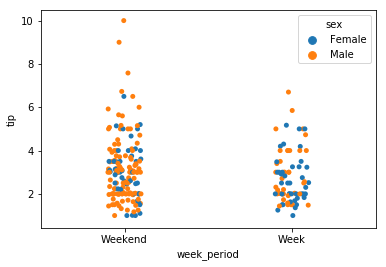

In [106]:
sns.stripplot(x='week_period', y='tip', data=tips, hue='sex', jitter=True)

/home/joaovitorez/miniconda3/envs/env-data-handling/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


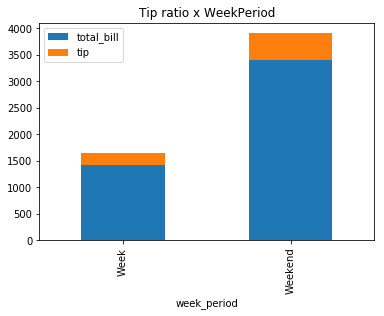

In [107]:
tentativa = tips.groupby(by='week_period')['total_bill','tip'].sum()
tentativa.plot(kind='bar', stacked=True)

plt.title('Tip ratio x WeekPeriod')
plt.show()